In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis as scipy_kurtosis, skew as scipy_skew, jarque_bera
import statsmodels.api as sm
from scipy.stats import norm, gaussian_kde, invgauss
import seaborn as sns
import pylab
!pip install arch
from arch import arch_model
from statsmodels.tsa.ar_model import AutoReg
from scipy.optimize import minimize
!pip install xlrd
!pip install pandas openpyxl
from sklearn.decomposition import FastICA
from statsmodels.regression.rolling import RollingOLS
from scipy.linalg import eigh

In [2]:
!pip install tensorflow
import tensorflow as tf

# load data and calculate log return

In [3]:
# IESE.AS belong to euro area is not included 
sri_ticker = [ 'PBW','CXSE','FAN'] 
sri_data = yf.download(sri_ticker,start="2013-01-01", end="2017-12-31")
sri_datatest = yf.download(sri_ticker,start="2018-01-01", end="2019-12-31")
sri_data_full = yf.download(sri_ticker,start="2013-01-01", end="2019-12-31")

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [4]:
for sri in sri_data:
    sri_log_returns = np.log(sri_data['Close'] / sri_data['Close'].shift(1))
for sri in sri_datatest:
    sri_log_returnstest = np.log(sri_datatest['Close'] / sri_datatest['Close'].shift(1))
for sri in sri_data_full:
    sri_data_full_returns = np.log(sri_data_full['Close'] / sri_data_full['Close'].shift(1))

In [5]:
# IMAE belong to euro area is not included 
traditional_ticker = ['URTH', 'SPY','EWH'] 
traditional_data = yf.download(traditional_ticker,start="2013-01-01", end="2017-12-31")
traditional_datatest = yf.download(traditional_ticker,start="2018-01-01", end="2019-12-31")
traditional_data_full = yf.download(traditional_ticker,start="2013-01-01", end="2019-12-31")

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [6]:
for tra in traditional_data:
    tra_log_returns = np.log(traditional_data['Close'] / traditional_data['Close'].shift(1))
    
for tra in traditional_datatest:
    tra_log_returnstest = np.log(traditional_datatest['Close'] / traditional_datatest['Close'].shift(1))
    
for tra in traditional_data_full:
    traditional_data_full_returns = np.log(traditional_data_full['Close'] / traditional_data_full['Close'].shift(1))

# descriptive statistic of log returns

### SUSTAINABLE(SRI)

In [7]:
sri_log_returns=pd.DataFrame(sri_log_returns).dropna()
sri_log_returns.index = pd.date_range(start=sri_log_returns.index[0], periods=len(sri_log_returns), freq='B')


sri_log_returnstest=pd.DataFrame(sri_log_returnstest).dropna()
sri_log_returnstest.index = pd.date_range(start=sri_log_returnstest.index[0], periods=len(sri_log_returnstest), freq='B')

sri_data_full_returns=pd.DataFrame(sri_data_full_returns).dropna()
sri_data_full_returns.index = pd.date_range(start=sri_data_full_returns.index[0], periods=len(sri_data_full_returns), freq='B')

In [8]:
print(len(sri_log_returns))
print(len(sri_data_full_returns))

1258
1760


In [9]:
# statistics of sri in sample returns
print(sri_log_returns.describe())

Ticker         CXSE          FAN          PBW
count   1258.000000  1258.000000  1258.000000
mean       0.000327     0.000503     0.000141
std        0.013954     0.011407     0.015494
min       -0.117260    -0.076312    -0.066310
25%       -0.005899    -0.005624    -0.008009
50%        0.000000     0.000796     0.000000
75%        0.007023     0.007037     0.009984
max        0.105334     0.043236     0.062996


In [10]:
# Skewness and Kurtosis
skewness_sri = sri_log_returns.skew()
kurtosis_sri = sri_log_returns.kurtosis()
print("Skewness:\n", skewness_sri)
print("Kurtosis:\n", kurtosis_sri)

Skewness:
 Ticker
CXSE   -0.270315
FAN    -0.511985
PBW    -0.343646
dtype: float64
Kurtosis:
 Ticker
CXSE    9.082851
FAN     2.681935
PBW     0.816933
dtype: float64


In [11]:
correlation_matrix_sri = sri_log_returns.corr()
print("Correlation Matrix:\n", correlation_matrix_sri)

Correlation Matrix:
 Ticker      CXSE       FAN       PBW
Ticker                              
CXSE    1.000000  0.358289  0.314797
FAN     0.358289  1.000000  0.527778
PBW     0.314797  0.527778  1.000000


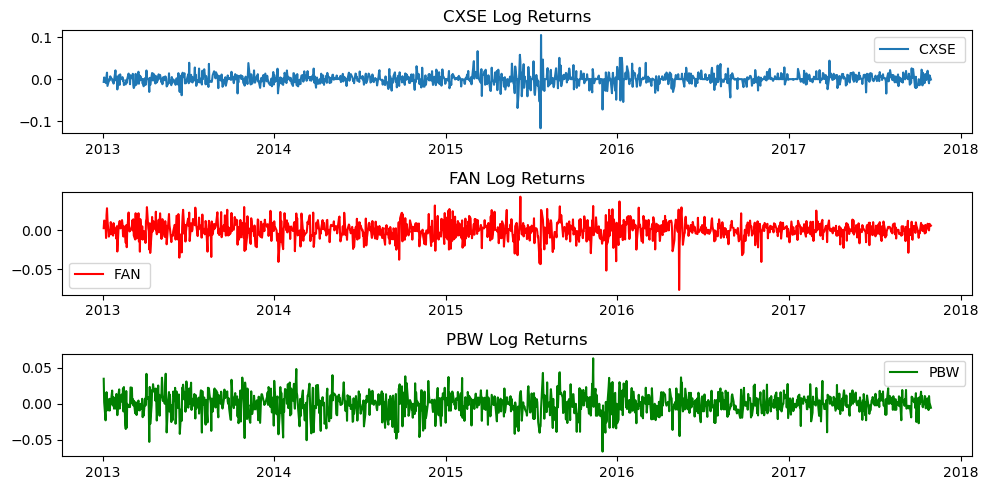

In [12]:
# sri_ticker = [ 'PBW','CXSE','FAN'] 
plt.figure(figsize=(10, 5))
# First subplot for 'URTH'
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(sri_log_returns['CXSE'], label='CXSE ')
plt.title('CXSE Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Second subplot for 'SPY'
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(sri_log_returns['FAN'], label='FAN ', color='red')
plt.title('FAN Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Third subplot for 'EWH'
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(sri_log_returns['PBW'], label='PBW', color='green')
plt.title('PBW Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

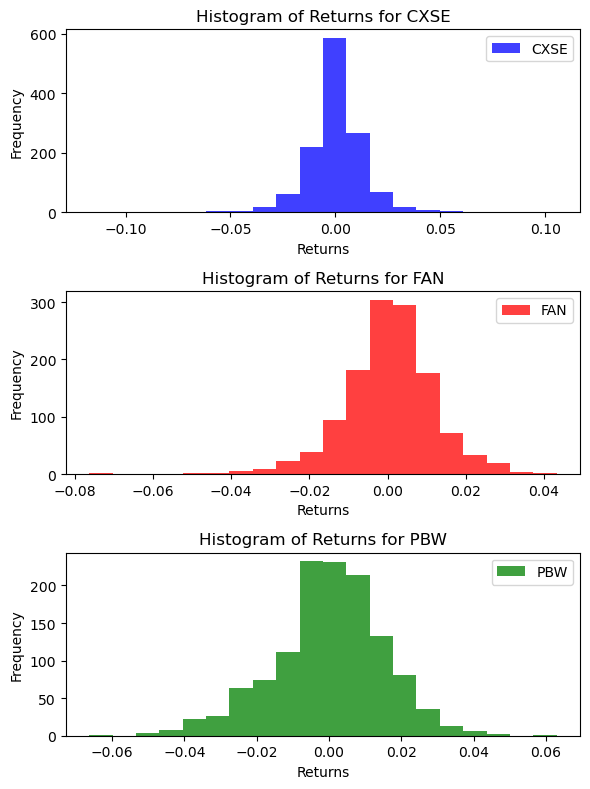

In [13]:
colors = ['blue', 'red', 'green']  # Adjusted color order to your specification

plt.figure(figsize=(6, 8))  # Adjust the figure size to accommodate multiple subplots

# Loop through each column and create a separate subplot for each
for i, column in enumerate(sri_log_returns.columns):
    plt.subplot(len(sri_log_returns.columns), 1, i + 1)  # Create a subplot for each asset
    plt.hist(sri_log_returns[column], bins=20, alpha=0.75, color=colors[i], label=column)
    plt.title(f'Histogram of Returns for {column}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap of subplot elements
plt.show()

### TRADITIONAL(TRA)

In [14]:
tra_log_returns=pd.DataFrame(tra_log_returns).dropna()
tra_log_returns.index = pd.date_range(start=tra_log_returns.index[0], periods=len(tra_log_returns), freq='B')

tra_log_returnstest=pd.DataFrame(tra_log_returnstest).dropna()
tra_log_returnstest.index = pd.date_range(start=tra_log_returnstest.index[0], periods=len(tra_log_returnstest), freq='B')

traditional_data_full_returns=pd.DataFrame(traditional_data_full_returns).dropna()
traditional_data_full_returns.index = pd.date_range(start=traditional_data_full_returns.index[0], periods=len(traditional_data_full_returns), freq='B')

In [15]:
print(len(tra_log_returns))
print(len(traditional_data_full_returns))

1258
1760


In [16]:
# statistics of tra in sample returns
print(tra_log_returns.describe())

Ticker          EWH          SPY         URTH
count   1258.000000  1258.000000  1258.000000
mean       0.000196     0.000479     0.000357
std        0.010289     0.007495     0.009604
min       -0.063648    -0.043019    -0.057455
25%       -0.005212    -0.002874    -0.003767
50%        0.000506     0.000545     0.000267
75%        0.006116     0.004553     0.004475
max        0.052878     0.037675     0.052818


In [17]:
# Skewness and Kurtosis
skewness = tra_log_returns.skew()
kurtosis = tra_log_returns.kurtosis()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Skewness:
 Ticker
EWH    -0.332386
SPY    -0.475769
URTH   -0.318080
dtype: float64
Kurtosis:
 Ticker
EWH     3.639833
SPY     3.010983
URTH    4.620259
dtype: float64


In [18]:
correlation_matrix_tra = tra_log_returns.corr()
print("Correlation Matrix:\n", correlation_matrix_tra)

Correlation Matrix:
 Ticker       EWH       SPY      URTH
Ticker                              
EWH     1.000000  0.594504  0.535190
SPY     0.594504  1.000000  0.712294
URTH    0.535190  0.712294  1.000000


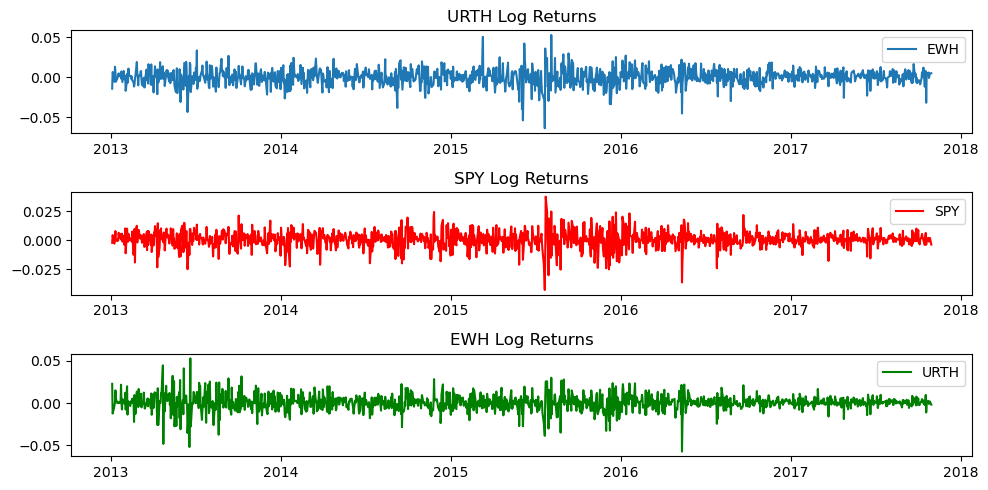

In [19]:
# traditional_ticker = ['EWH', 'SPY','URTH'] 
plt.figure(figsize=(10, 5))
# First subplot for 'URTH'
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(tra_log_returns['EWH'], label='EWH')
plt.title('URTH Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Second subplot for 'SPY'
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(tra_log_returns['SPY'], label='SPY', color='red')
plt.title('SPY Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Third subplot for 'EWH'
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(tra_log_returns['URTH'], label='URTH', color='green')
plt.title('EWH Log Returns')
plt.legend()  # Ensure the legend is called right after plotting
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

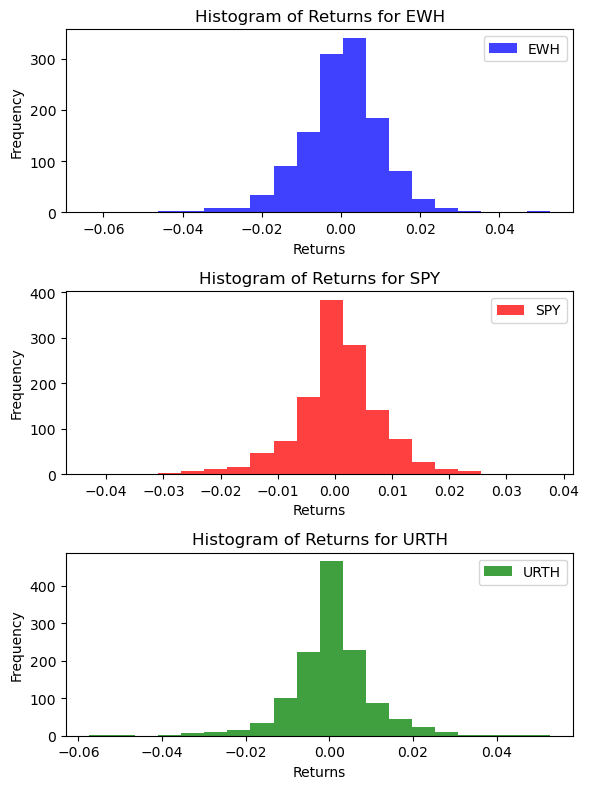

In [20]:
colors = ['blue', 'red', 'green']  # Adjusted color order to your specification

plt.figure(figsize=(6, 8
                   ))  # Adjust the figure size to accommodate multiple subplots

# Loop through each column and create a separate subplot for each
for i, column in enumerate(tra_log_returns.columns):
    plt.subplot(len(tra_log_returns.columns), 1, i + 1)  # Create a subplot for each asset
    plt.hist(tra_log_returns[column], bins=20, alpha=0.75, color=colors[i], label=column)
    plt.title(f'Histogram of Returns for {column}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap of subplot elements
plt.show()

# GARCh (1,1) for each ETF in 2 Portfolio SRI & TRADITIONAL
# Conditional variances

In [21]:
#univariate GARCH(1,1)
def fit_garch_model(log_returns, etf_name):
    # Initialize the GARCH 1,1 model
    model = arch_model(log_returns, mean='Zero', vol='GARCH', p=1, q=1, rescale=False)
    # Fit the model
    model_fit = model.fit(disp='off')
    # Print the summary of the model
    print(f"GARCH(1,1) Model Summary for {etf_name}:")
    print( model_fit.summary())
    #print(f'conditional variance for {etf_name}:')
    conditional_variances= model_fit.conditional_volatility**2
    print('======')
    return conditional_variances

In [22]:
# sri_ticker = [ 'PBW','CXSE','FAN']
# GARCH (1,1) in sample
conditional_variances_pbw=fit_garch_model(sri_log_returns['PBW'], 'PBW')
conditional_variances_cxse=fit_garch_model(sri_log_returns['CXSE'], 'CXSE')
conditional_variances_fan=fit_garch_model(sri_log_returns['FAN'], 'FAN')

GARCH(1,1) Model Summary for PBW:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    PBW   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3499.70
Distribution:                  Normal   AIC:                          -6993.40
Method:            Maximum Likelihood   BIC:                          -6977.99
                                        No. Observations:                 1258
Date:                Tue, Jul 09 2024   Df Residuals:                     1258
Time:                        20:28:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.7978e-06  5

In [23]:
# sri_ticker = [ 'PBW','CXSE','FAN']
# GARCH (1,1) out-of sample
print('out of sample sri')
conditional_variances_pbw_test=fit_garch_model(sri_log_returnstest['PBW'], 'PBW')
conditional_variances_cxse_test=fit_garch_model(sri_log_returnstest['CXSE'], 'CXSE')
conditional_variances_fan_test=fit_garch_model(sri_log_returnstest['FAN'], 'FAN')

out of sample sri
GARCH(1,1) Model Summary for PBW:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    PBW   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:                1457.33
Distribution:                  Normal   AIC:                          -2908.67
Method:            Maximum Likelihood   BIC:                          -2896.02
                                        No. Observations:                  501
Date:                Tue, Jul 09 2024   Df Residuals:                      501
Time:                        20:28:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega 

In [24]:
# GARCH (1,1) in sample
# traditional_ticker = ['URTH', 'SPY','EWH']
conditional_variances_urth=fit_garch_model(tra_log_returns['URTH'], 'URTH')
conditional_variances_spy=fit_garch_model(tra_log_returns['SPY'], 'SPY')
conditional_variances_ewh=fit_garch_model(tra_log_returns['EWH'], 'EWH')

GARCH(1,1) Model Summary for URTH:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   URTH   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                4225.14
Distribution:                  Normal   AIC:                          -8444.29
Method:            Maximum Likelihood   BIC:                          -8428.87
                                        No. Observations:                 1258
Date:                Tue, Jul 09 2024   Df Residuals:                     1258
Time:                        20:28:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.8459e-06  

In [25]:
# GARCH (1,1) out of sample
# traditional_ticker = ['URTH', 'SPY','EWH']
conditional_variances_urth_test=fit_garch_model(tra_log_returnstest['URTH'], 'URTH')
conditional_variances_spy_test=fit_garch_model(tra_log_returnstest['SPY'], 'SPY')
conditional_variances_ewh_test=fit_garch_model(tra_log_returnstest['EWH'], 'EWH')

GARCH(1,1) Model Summary for URTH:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   URTH   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:                1718.22
Distribution:                  Normal   AIC:                          -3430.43
Method:            Maximum Likelihood   BIC:                          -3417.78
                                        No. Observations:                  501
Date:                Tue, Jul 09 2024   Df Residuals:                      501
Time:                        20:28:08   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      7.4384e-06  

# estimate lamda for each ETF in the sample period

In [26]:
def ols_regression(data, dependent_var, conditional_variances):
    # Create a temporary copy of data for manipulations to avoid altering the original DataFrame
    temp_data = data.copy()
    # Calculate 1-lagged return for the independent variable and store in the temporary DataFrame
    temp_data['lagged_return'] = temp_data[dependent_var].shift(1)
    # Attach the pre-computed conditional variances to the temporary DataFrame
    temp_data['conditional_variances'] = conditional_variances
    # Ensure there are no NaN values by dropping rows with NaNs in the newly created columns and the dependent variable
    temp_data.dropna(subset=['lagged_return', 'conditional_variances', dependent_var], inplace=True)
    
    # Prepare independent variables (including constant for intercept)
    X = sm.add_constant(temp_data[['lagged_return', 'conditional_variances']])
    
    # Define the dependent variable using the cleaned temporary DataFrame
    y = temp_data[dependent_var]
    
    # Fit the OLS regression model
    model_fit = sm.OLS(y, X).fit()
    lambda_estimate = model_fit.params.get('conditional_variances', None)
    print(f"Estimated λ-coefficient for {dependent_var}: {lambda_estimate}")
    print(model_fit.summary())
    print('***')
    return model_fit
    return lambda_estimate

In [27]:
# sri_ticker = [ 'PBW','CXSE','FAN']
# regression of in sample
rraPBW = ols_regression(
    data=sri_log_returns,
    dependent_var='PBW',
    conditional_variances=conditional_variances_pbw)
rraCXSE = ols_regression(
    data=sri_log_returns,
    dependent_var='CXSE',
    conditional_variances=conditional_variances_cxse)
rraFAN = ols_regression(
    data=sri_log_returns,
    dependent_var='FAN',
    conditional_variances=conditional_variances_fan)

Estimated λ-coefficient for PBW: 4.513659946289325
                            OLS Regression Results                            
Dep. Variable:                    PBW   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.119
Date:                Tue, 09 Jul 2024   Prob (F-statistic):             0.0446
Time:                        20:28:08   Log-Likelihood:                 3460.3
No. Observations:                1257   AIC:                            -6915.
Df Residuals:                    1254   BIC:                            -6899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [28]:
# traditional_ticker = ['URTH', 'SPY','EWH']
# regression in sample
rraURTH = ols_regression(
    data=tra_log_returns,
    dependent_var='URTH',
    conditional_variances=conditional_variances_urth)
rraSPY = ols_regression(
    data=tra_log_returns,
    dependent_var='SPY',
    conditional_variances=conditional_variances_spy)
rraEWH = ols_regression(
    data=tra_log_returns,
    dependent_var='EWH',
    conditional_variances=conditional_variances_ewh)

Estimated λ-coefficient for URTH: 3.2724661031690787
                            OLS Regression Results                            
Dep. Variable:                   URTH   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     15.08
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           3.38e-07
Time:                        20:28:08   Log-Likelihood:                 4073.5
No. Observations:                1257   AIC:                            -8141.
Df Residuals:                    1254   BIC:                            -8126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# forecast lamda of FAN & PSY in out of sample period by choose the fit model, lamda of FAN & SPY to estimate 

In [29]:
def forecast_lambda(data, dependent_var, conditional_variances, model_fit):
    # Prepare the new predictor data
    new_data = data.copy()
    new_data['lagged_return'] = new_data[dependent_var].shift(1)  # Assuming 'data' is a DataFrame with log returns as its main column
    new_data['conditional_variances'] = pd.Series(conditional_variances, index=new_data.index)
    # Drop rows with NaN values which might occur due to shifting
    new_data.dropna(inplace=True)
    # Prepare the X matrix for prediction
    X_new = sm.add_constant(new_data[['lagged_return', 'conditional_variances']])
    # Predict new lambda values using the fitted model
    new_data['predicted_lambda'] = model_fit.predict(X_new)
    return new_data[['predicted_lambda']]

In [30]:

# sri_log_returnstest
# rraFAN
predicted_lambdas_fan = forecast_lambda(data=sri_log_returnstest, dependent_var='FAN', conditional_variances= conditional_variances_fan_test, model_fit= rraFAN)
print(predicted_lambdas_fan)

Ticker      predicted_lambda
2018-01-04          0.000131
2018-01-05          0.000072
2018-01-08          0.000036
2018-01-09          0.000104
2018-01-10          0.000041
...                      ...
2019-11-28          0.000027
2019-11-29          0.000011
2019-12-02          0.000002
2019-12-03          0.000006
2019-12-04          0.000070

[500 rows x 1 columns]


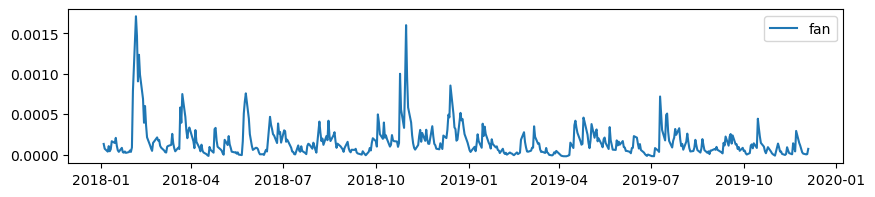

In [31]:
plt.figure(figsize=(10, 2))
plt.plot(predicted_lambdas_fan, label='fan')
plt.legend()

In [32]:
print(predicted_lambdas_fan['predicted_lambda'].describe())

count    500.000000
mean       0.000161
std        0.000205
min       -0.000022
25%        0.000040
50%        0.000102
75%        0.000204
max        0.001711
Name: predicted_lambda, dtype: float64


### TRA

In [33]:
# tra_log_returnstest
# rraSPY
predicted_lambdas_spy = forecast_lambda(data=tra_log_returnstest, dependent_var='SPY', conditional_variances= conditional_variances_spy_test, model_fit= rraFAN)
print(predicted_lambdas_spy)

Ticker      predicted_lambda
2018-01-04          0.000266
2018-01-05          0.000169
2018-01-08          0.000142
2018-01-09          0.000060
2018-01-10          0.000012
...                      ...
2019-11-28         -0.000083
2019-11-29         -0.000090
2019-12-02         -0.000103
2019-12-03         -0.000065
2019-12-04         -0.000092

[500 rows x 1 columns]


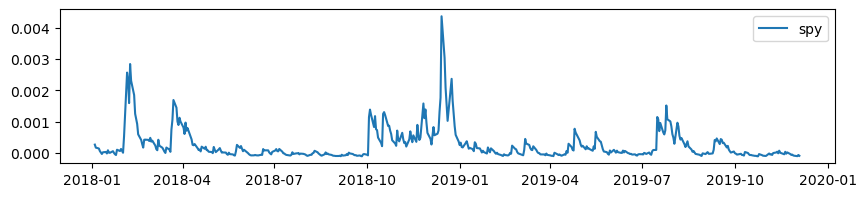

In [34]:
plt.figure(figsize=(10, 2))
plt.plot(predicted_lambdas_spy, label='spy')
plt.legend()

In [35]:
print(predicted_lambdas_spy['predicted_lambda'].describe())

count    500.000000
mean       0.000252
std        0.000500
min       -0.000107
25%       -0.000037
50%        0.000059
75%        0.000344
max        0.004365
Name: predicted_lambda, dtype: float64


# go garch (1,1) for all ETFS in 2 portfolio direclty in the out of sample period

In [36]:
# Try to infer the frequency of the date index
inferred_freq = pd.infer_freq(sri_log_returnstest.index)
if inferred_freq is not None:
    sri_log_returnstest.index.freq = inferred_freq

inferred_freq = pd.infer_freq(tra_log_returnstest.index)
if inferred_freq is not None:
    tra_log_returnstest.index.freq = inferred_freq

In [37]:
# handle NaN value
print("NaNs in each column:")
print(sri_log_returnstest.isna().sum())
# Check for infinite values
print("\nInfinite values in each column:")
print((np.isinf(sri_log_returnstest)).sum())
sri_log_returnstest.dropna(inplace=True)

NaNs in each column:
Ticker
CXSE    0
FAN     0
PBW     0
dtype: int64

Infinite values in each column:
Ticker
CXSE    0
FAN     0
PBW     0
dtype: int64


In [38]:
# handle NaN value
print("NaNs in each column:")
print(tra_log_returnstest.isna().sum())
# Check for infinite values
print("\nInfinite values in each column:")
print((np.isinf(tra_log_returnstest)).sum())
tra_log_returnstest.dropna(inplace=True)

NaNs in each column:
Ticker
EWH     0
SPY     0
URTH    0
dtype: int64

Infinite values in each column:
Ticker
EWH     0
SPY     0
URTH    0
dtype: int64


### Fit AR(1) for each ETFs

In [39]:
# SRI AR 1 for each ETF
# Fit AR(1) model to each SRI log returns
conditional_means = pd.DataFrame(index=sri_log_returnstest.index, columns=sri_log_returnstest.columns)
residuals = pd.DataFrame(index=sri_log_returnstest.index, columns=sri_log_returnstest.columns)
model_params = pd.DataFrame(index=['mean', 'theta', 'variance'], columns=sri_log_returnstest.columns)

for etf in sri_log_returns.columns:
    model = AutoReg(sri_log_returnstest[etf], lags=1, old_names=False)
    fitted_model = model.fit()
    conditional_means[etf] = fitted_model.fittedvalues
    residuals[etf] = fitted_model.resid

    # Store model parameters
    model_params.at['mean', etf] = fitted_model.params.get('const', 0)  # Safe access with default
    model_params.at['theta', etf] = fitted_model.params.get(etf + '.L1', 0)  # Safe access with default
    model_params.at['variance', etf] = fitted_model.sigma2

# Compute the sample covariance matrix Σ from the AR residuals
sri_covariance_matrix = residuals.cov()
sri_covariance_array = sri_covariance_matrix.values

# Output results
print(f"Model Parameters: (Mean, Theta, Variance):")
print(model_params)
print(f"Residual:")
print(residuals)
print("Sample Covariance Matrix:")
print(sri_covariance_matrix)

Model Parameters: (Mean, Theta, Variance):
Ticker        CXSE       FAN       PBW
mean     -0.000165  0.000165  0.000514
theta     0.055175   0.07708  0.065582
variance  0.000242  0.000076  0.000183
Residual:
Ticker          CXSE       FAN       PBW
2018-01-03       NaN       NaN       NaN
2018-01-04  0.000031  0.000758 -0.004736
2018-01-05  0.007312  0.001275 -0.002182
2018-01-08  0.005792  0.008662  0.002340
2018-01-09  0.005711 -0.002339 -0.008894
...              ...       ...       ...
2019-11-28 -0.001886  0.001326  0.003364
2019-11-29  0.002815  0.001801  0.002456
2019-12-02  0.008478  0.003120  0.006062
2019-12-03  0.000900  0.007789 -0.013989
2019-12-04 -0.004356 -0.006270  0.011898

[501 rows x 3 columns]
Sample Covariance Matrix:
Ticker      CXSE       FAN       PBW
Ticker                              
CXSE    0.000242  0.000081  0.000133
FAN     0.000081  0.000076  0.000065
PBW     0.000133  0.000065  0.000184


In [40]:
# SRI AR 1 for each ETF
# Fit AR(1) model to each TRA log returns
# Initialization of storage for fitted values, residuals, and model parameters
conditional_means_tra = pd.DataFrame(index=tra_log_returnstest.index, columns=tra_log_returnstest.columns)
residuals_tra = pd.DataFrame(index=tra_log_returnstest.index, columns=tra_log_returnstest.columns)
model_params_tra = pd.DataFrame(index=['mean', 'theta', 'variance'], columns=tra_log_returnstest.columns)

# Fitting the AR(1) model
for etf in tra_log_returnstest.columns:
    model_tra = AutoReg(tra_log_returnstest[etf].dropna(), lags=1, old_names=False)
    fitted_model_tra = model_tra.fit()
    conditional_means_tra[etf] = fitted_model_tra.fittedvalues
    residuals_tra[etf] = fitted_model_tra.resid

    # Store model parameters
    model_params_tra.at['mean', etf] = fitted_model_tra.params.get('const', 0)
    model_params_tra.at['theta', etf] = fitted_model_tra.params.get('L1', 0)
    model_params_tra.at['variance', etf] = fitted_model_tra.sigma2

# Computing the sample covariance matrix from the AR residuals
tra_covariance_matrix = residuals_tra.cov()
tra_covariance_array = tra_covariance_matrix.values

# Output results
print("Model Parameters: (Mean, Theta, Variance):")
print(model_params_tra)
print("\nResiduals:")
print(residuals_tra)
print("\nSample Covariance Matrix:")
print(tra_covariance_matrix)

Model Parameters: (Mean, Theta, Variance):
Ticker         EWH       SPY      URTH
mean     -0.000121  0.000351  0.000196
theta            0         0         0
variance  0.000122   0.00009  0.000074

Residuals:
Ticker           EWH       SPY      URTH
2018-01-03       NaN       NaN       NaN
2018-01-04  0.000316  0.003999  0.004366
2018-01-05  0.002811  0.006387  0.007757
2018-01-08 -0.000353  0.001627 -0.002509
2018-01-09  0.003215  0.001951  0.002092
...              ...       ...       ...
2019-11-28 -0.001664  0.001163 -0.000426
2019-11-29  0.001008 -0.000285  0.000307
2019-12-02  0.003826  0.004958  0.003560
2019-12-03  0.004129 -0.000478  0.001580
2019-12-04  0.001221 -0.005886 -0.007666

[501 rows x 3 columns]

Sample Covariance Matrix:
Ticker       EWH       SPY      URTH
Ticker                              
EWH     0.000122  0.000065  0.000063
SPY     0.000065  0.000090  0.000079
URTH    0.000063  0.000079  0.000075


### whitening data and decomposition to get the mixing matrix

In [41]:
# step 2
# SRI
# Eigenvalue decomposition of the provided covariance matrix 
eigenvalues, eigenvectors = eigh(sri_covariance_matrix)

# Whitening transformation
positive_eigenvalues = np.clip(eigenvalues, a_min=1e-10, a_max=None)
D_inv_sqrt = np.diag(1.0 / np.sqrt(positive_eigenvalues))
whitening_matrix = eigenvectors @ D_inv_sqrt @ eigenvectors.T
residuals_np = residuals.values.astype(float)
whitened_data_np = np.dot(residuals.values, whitening_matrix)
whitened_data = residuals.values @ whitening_matrix

#forward fill any remaining NaN values #backward fill any remaining NaN values
whitened_data_df = pd.DataFrame(whitened_data, index=residuals.index, columns=residuals.columns)
whitened_data_df.ffill(inplace=True)
whitened_data_df.bfill(inplace=True)

ica = FastICA(whiten=False)  # No need to whiten as data is already pre-whitened
try:
    independent_components = ica.fit_transform(whitened_data)
    mixing_matrix = ica.mixing_
    unmixing_matrix = np.linalg.inv(mixing_matrix)

    print("Independent Components:\n", independent_components)
    print("Mixing Matrix A:\n", mixing_matrix)
    print("Unmixing Matrix W (A^(-1)):\n", unmixing_matrix)
except ValueError as e:
    print("Error during FastICA:", e)

Independent Components:
 [[-0.24254283  0.35528978  0.27763442]
 [-0.24254283  0.35528978  0.27763442]
 [-0.72385277  0.1197621   0.16719031]
 ...
 [-0.3551518  -0.07512991 -0.42759839]
 [-0.69601244  1.82431143  0.61078069]
 [ 0.90624847 -1.41408181 -0.5705554 ]]
Mixing Matrix A:
 [[-0.95135087 -0.14338816 -0.27271112]
 [-0.01194613  0.9016113  -0.43238218]
 [ 0.30787792 -0.40808932 -0.85946163]]
Unmixing Matrix W (A^(-1)):
 [[-0.95135087 -0.01194613  0.30787792]
 [-0.14338816  0.9016113  -0.40808932]
 [-0.27271112 -0.43238218 -0.85946163]]


In [42]:
# TRA
tra_covariance_matrix_np = tra_covariance_matrix.values.astype(float)
eigenvalues, eigenvectors = eigh(tra_covariance_matrix_np)

positive_eigenvalues = np.clip(eigenvalues, a_min=1e-10, a_max=None)
D_inv_sqrt = np.diag(1.0 / np.sqrt(positive_eigenvalues))
whitening_matrix = eigenvectors @ D_inv_sqrt @ eigenvectors.T

whitened_data = residuals_tra.values @ whitening_matrix
whitened_data_df = pd.DataFrame(whitened_data, index=residuals_tra.index, columns=residuals_tra.columns)
whitened_data_df.ffill(inplace=True)
whitened_data_df.bfill(inplace=True)

ica = FastICA(whiten=False)  # Since data is already pre-whitened
try:
    independent_components_tra = ica.fit_transform(whitened_data_df)
    mixing_matrix_tra = ica.mixing_
    unmixing_matrix_tra = np.linalg.inv(mixing_matrix_tra)

    print("Independent Components TRA:\n", independent_components_tra)
    print("Mixing Matrix A TRA:\n", mixing_matrix_tra)
    print("Unmixing Matrix W (A^(-1)) TRA:\n", unmixing_matrix_tra)
except ValueError as e:
    print("Error during FastICA:", e)

Independent Components TRA:
 [[-0.31690369  0.39115043 -0.51843798]
 [-0.31690369  0.39115043 -0.51843798]
 [-0.32415047  0.95857332 -0.80929816]
 ...
 [ 0.23233151 -0.38889661 -0.46302464]
 [ 0.28631041  0.86755842  0.06133688]
 [ 0.81215841 -1.1546649   0.86797027]]
Mixing Matrix A TRA:
 [[ 0.98409765  0.1455742  -0.10178395]
 [ 0.01630352 -0.64462288 -0.76432685]
 [-0.17687853  0.75051282 -0.63674523]]
Unmixing Matrix W (A^(-1)) TRA:
 [[ 0.98409765  0.01630352 -0.17687853]
 [ 0.1455742  -0.64462288  0.75051282]
 [-0.10178395 -0.76432685 -0.63674523]]


### finding the factorial GARCH (1,1)

In [43]:

# step 3 sri GARCH (1,1) 
column_names = [f"Factor_{i+1}" for i in range(independent_components.shape[1])]
independent_components_df = pd.DataFrame(independent_components, columns=column_names)
H_f_t = []
# Dictionary to store models and results
garch_models = {}
results_summary = {}

# Loop through each column in the DataFrame which represents a factor.
for factor in independent_components_df.columns:
    # Initialize and fit a GARCH(1,1) model to the factor data.
    model = arch_model(independent_components_df[factor], mean='Zero', vol='Garch', p=1, q=1)
    res = model.fit(update_freq=0, disp='off')  # Fit the model quietly without updating the console.
    H_f_t.append(res.conditional_volatility**2)
    # Store the fitted model and results in dictionaries for easy access later.
    garch_models[factor] = res
    results_summary[factor] = {
        'omega': res.params.get('omega', float('nan')),  # Constant variance component
        'alpha': res.params.get('alpha[1]', float('nan')),  # Response of volatility to shocks
        'beta': res.params.get('beta[1]', float('nan')),  # Volatility persistence
        'Log Likelihood': res.loglikelihood  # Model's log likelihood
    }

# Optionally, convert the results summary to a DataFrame for better visualization and analysis.
results_df = pd.DataFrame(results_summary).T  # Transpose to have factors as rows and parameters as columns.
print(results_df)

             omega     alpha          beta  Log Likelihood
Factor_1  0.050523  0.083522  8.656430e-01     -695.192882
Factor_2  0.887494  0.105720  5.821781e-12     -705.506485
Factor_3  0.095026  0.111813  7.932334e-01     -693.117628


In [44]:
# step 3 tra GARCH !! 
column_names = [f"Factor_{i+1}" for i in range(independent_components_tra.shape[1])]
independent_components_df = pd.DataFrame(independent_components_tra, columns=column_names)

# Dictionary to store models and results
garch_models = {}
results_summary = {}
H_f_t_tra = []
# Loop through each column in the DataFrame which represents a factor.
for factor in independent_components_df.columns:
    # Initialize and fit a GARCH(1,1) model to the factor data.
    model = arch_model(independent_components_df[factor], mean='Zero', vol='Garch', p=1, q=1)
    res = model.fit(update_freq=0, disp='off')  # Fit the model quietly without updating the console.
    H_f_t_tra.append(res.conditional_volatility**2)
    # Store the fitted model and results in dictionaries for easy access later.
    garch_models[factor] = res
    results_summary[factor] = {
        'omega': res.params.get('omega', float('nan')),  # Constant variance component
        'alpha': res.params.get('alpha[1]', float('nan')),  # Response of volatility to shocks
        'beta': res.params.get('beta[1]', float('nan')),  # Volatility persistence
        'Log Likelihood': res.loglikelihood  # Model's log likelihood
    }

# Optionally, convert the results summary to a DataFrame for better visualization and analysis.
results_df_tra = pd.DataFrame(results_summary).T  # Transpose to have factors as rows and parameters as columns.
print(results_df_tra)

             omega     alpha      beta  Log Likelihood
Factor_1  0.034195  0.038745  0.928178     -699.763580
Factor_2  0.405582  0.118428  0.487020     -706.920688
Factor_3  0.053496  0.237213  0.728495     -638.650068


### compute the conditional covariance matrices Σ_t

In [45]:
# Step 4: Compute the conditional covariance matrices Σ_t of SRI
H_f_t = np.array(H_f_t).T  # Transpose to have time on rows and factors on columns
conditional_covariances_sri = []
for t in range(H_f_t.shape[0]):
    # Construct the diagonal matrix of variances for time t
    H_t = np.diag(H_f_t[t])
    # Calculate the conditional covariance matrix Σ_t
    Σ_t = mixing_matrix@ H_t @ mixing_matrix.T
    conditional_covariances_sri.append(Σ_t)
conditional_covariances_sri = np.array(conditional_covariances_sri)  # Optional: convert list to array for easier handling

print("Example of Conditional Covariance Matrix Σ_t of SRI at time t=0:")
print(conditional_covariances_sri[0])
print(conditional_covariances_sri.shape)

Example of Conditional Covariance Matrix Σ_t of SRI at time t=0:
[[ 0.93253956 -0.01116629 -0.00137131]
 [-0.01116629  0.98232519 -0.03258416]
 [-0.00137131 -0.03258416  0.92734143]]
(501, 3, 3)


In [46]:
# Step 4: Compute the conditional covariance matrices Σ_t of TRA
H_f_t_tra = np.array(H_f_t_tra).T  # Transpose to have time on rows and factors on columns
conditional_covariances_tra = []
for t in range(H_f_t_tra.shape[0]):
    # Construct the diagonal matrix of variances for time t
    H_t_tra = np.diag(H_f_t_tra[t])
    # Calculate the conditional covariance matrix Σ_t
    Σ_t = mixing_matrix_tra@H_t_tra@ mixing_matrix_tra.T
    conditional_covariances_tra.append(Σ_t)
conditional_covariances_tra = np.array(conditional_covariances_tra)  # Optional: convert list to array for easier handling

print("Example of Conditional Covariance Matrix Σ_t of TRA:")
print(conditional_covariances_tra)

Example of Conditional Covariance Matrix Σ_t of TRA:
[[[ 0.42497186  0.02560365  0.10088259]
  [ 0.02560365  1.0749883   0.20399737]
  [ 0.10088259  0.20399737  0.98734649]]

 [[ 0.43116941  0.00877588  0.08465612]
  [ 0.00877588  0.94426463  0.09750917]
  [ 0.08465612  0.09750917  0.89608728]]

 [[ 0.43740795 -0.00352146  0.07260575]
  [-0.00352146  0.84932883  0.01958415]
  [ 0.07260575  0.01958415  0.83006085]]

 ...

 [[ 0.86709068 -0.0605464  -0.02488568]
  [-0.0605464   0.5686282  -0.36469168]
  [-0.02488568 -0.36469168  0.6984893 ]]

 [[ 0.84006701 -0.04954266 -0.02823657]
  [-0.04954266  0.55020455 -0.30274986]
  [-0.02823657 -0.30274986  0.65931631]]

 [[ 0.81782445 -0.05427187 -0.02295674]
  [-0.05427187  0.54652411 -0.32725613]
  [-0.02295674 -0.32725613  0.66316291]]]


In [47]:
print('shape of covariance matrix')
print(conditional_covariances_tra.shape)

shape of covariance matrix
(501, 3, 3)


### estimate the dynamic third order skewness & fourth order kurtosis

In [48]:
# STEP 5 for SRI
f_t_sri = independent_components  # Should be an array of shape (time_points, n_components)
n_components_sri = f_t_sri.shape[1]  # Number of components/factors
# Initialize arrays to store co-moments
M3_t_sri = np.zeros((n_components_sri, n_components_sri, n_components_sri))
M4_t_sri = np.zeros((n_components_sri, n_components_sri, n_components_sri, n_components_sri))

# Assume A is your mixing matrix
A = mixing_matrix  # Ensure this is correctly defined and corresponds with f_t in shape

# Compute higher-order co-moments directly in the loops
for i in range(n_components_sri):
    for j in range(n_components_sri):
        for k in range(n_components_sri):
            # Compute the third-order co-moment for each combination of factors
            third_moment = np.mean(f_t_sri[:, i] * f_t_sri[:, j] * f_t_sri[:, k])
            M3_t_sri[i, j, k] = np.sum(A[i, :] * A[j, :] * A[k, :] * third_moment)

for i in range(n_components_sri):
    for j in range(n_components_sri):
        for k in range(n_components_sri):
            for l in range(n_components_sri):
                # Compute the fourth-order co-moment for each combination of factors
                fourth_moment = np.mean(f_t_sri[:, i] * f_t_sri[:, j] * f_t_sri[:, k] * f_t_sri[:, l])
                M4_t_sri[i, j, k, l] = np.sum(A[i, :] * A[j, :] * A[k, :] * A[l, :] * fourth_moment)
# Print results
print("Dynamic third-order co-moment array SRI, M3_t:")
print(M3_t_sri[1])  # Example of the third co-moment array for the second set of factors
print("Dynamic fourth-order co-moment array SRI, M4_t:")
print(M4_t_sri[1])  # Example of the fourth co-moment array for the second set of factors

Dynamic third-order co-moment array SRI, M3_t:
[[ 0.0017293   0.01037274 -0.00075445]
 [ 0.01037274  0.01143232 -0.03865222]
 [-0.00075445 -0.03865222  0.00938217]]
Dynamic fourth-order co-moment array SRI, M4_t:
[[[-8.22842895e-04  2.60008341e-02 -1.02782501e-03]
  [ 2.60008341e-02  1.27475982e-02 -8.06414701e-04]
  [-1.02782501e-03 -8.06414701e-04  3.17589479e-03]]

 [[ 2.60008341e-02  1.27475982e-02 -8.06414701e-04]
  [ 1.27475982e-02  3.32607251e+00  6.67506310e-02]
  [-8.06414701e-04  6.67506310e-02  3.01582328e-01]]

 [[-1.02782501e-03 -8.06414701e-04  3.17589479e-03]
  [-8.06414701e-04  6.67506310e-02  3.01582328e-01]
  [ 3.17589479e-03  3.01582328e-01 -3.80876182e-02]]]


In [49]:
# STEP 5 for TRA
f_t = independent_components_tra  # Should be an array of shape (time_points, n_components)
n_components = f_t.shape[1]  # Number of components/factors
# Initialize arrays to store co-moments
M3_t_tra = np.zeros((n_components, n_components, n_components))
M4_t_tra = np.zeros((n_components, n_components, n_components, n_components))

# Assume A is your mixing matrix
A = mixing_matrix_tra  # Ensure this is correctly defined and corresponds with f_t in shape

# Compute higher-order co-moments directly in the loops
for i in range(n_components):
    for j in range(n_components):
        for k in range(n_components):
            # Compute the third-order co-moment for each combination of factors
            third_moment = np.mean(f_t[:, i] * f_t[:, j] * f_t[:, k])
            M3_t_tra[i, j, k] = np.sum(A[i, :] * A[j, :] * A[k, :] * third_moment)

for i in range(n_components):
    for j in range(n_components):
        for k in range(n_components):
            for l in range(n_components):
                # Compute the fourth-order co-moment for each combination of factors
                fourth_moment = np.mean(f_t[:, i] * f_t[:, j] * f_t[:, k] * f_t[:, l])
                M4_t_tra[i, j, k, l] = np.sum(A[i, :] * A[j, :] * A[k, :] * A[l, :] * fourth_moment)

# Print results
print("Dynamic third-order co-moment array TRA, M3_t:")
print(M3_t_tra[1])  # Example of the third co-moment array for the second set of factors
print("Dynamic fourth-order co-moment array TRA, M4_t:")
print(M4_t_tra[1])  # Example of the fourth co-moment array for the second set of factors

Dynamic third-order co-moment array TRA, M3_t:
[[ 5.78781637e-04 -1.34761823e-04 -1.88434173e-03]
 [-1.34761823e-04  7.58518459e-01 -5.25873653e-05]
 [-1.88434173e-03 -5.25873653e-05  1.60422748e-01]]
Dynamic fourth-order co-moment array TRA, M4_t:
[[[ 9.55722050e-04  1.61748963e-02  6.06385038e-04]
  [ 1.61748963e-02  2.40167736e-03 -5.62615829e-03]
  [ 6.06385038e-04 -5.62615829e-03  6.11921946e-03]]

 [[ 1.61748963e-02  2.40167736e-03 -5.62615829e-03]
  [ 2.40167736e-03  4.60071747e+00  6.39303944e-02]
  [-5.62615829e-03  6.39303944e-02  1.08125263e+00]]

 [[ 6.06385038e-04 -5.62615829e-03  6.11921946e-03]
  [-5.62615829e-03  6.39303944e-02  1.08125263e+00]
  [ 6.11921946e-03  1.08125263e+00 -5.71427468e-02]]]


# portfolio optimization

### SRI

In [50]:
predicted_lambdas_fan = pd.DataFrame(predicted_lambdas_fan,columns=['predicted_lambda'])
predicted_lambdas_fan.index = pd.date_range(start=predicted_lambdas_fan.index[0], periods=len(predicted_lambdas_fan), freq='B')
print(predicted_lambdas_fan)

            predicted_lambda
2018-01-04          0.000131
2018-01-05          0.000072
2018-01-08          0.000036
2018-01-09          0.000104
2018-01-10          0.000041
...                      ...
2019-11-28          0.000027
2019-11-29          0.000011
2019-12-02          0.000002
2019-12-03          0.000006
2019-12-04          0.000070

[500 rows x 1 columns]


In [51]:
print(M3_t_sri.shape)

(3, 3, 3)


In [52]:
print(M4_t_sri.shape)

(3, 3, 3, 3)


In [53]:
# Trimming conditional_covariances_tra to match the length of predicted_lambdas_spy
conditional_covariances_sri = conditional_covariances_sri[:500]
sri_ticker_1 = [ 'CXSE','FAN','PBW'] 
# Assuming M3_t_sri and M4_t_sri are static, we only need one set of these matrices
assert M3_t_sri.shape == (3, 3, 3), f"Expected skewness matrix shape (3, 3, 3) but got {M3_t_sri.shape}"
assert M4_t_sri.shape == (3, 3, 3, 3), f"Expected kurtosis matrix shape (3, 3, 3, 3) but got {M4_t_sri.shape}"

# Risk exposure function
def risk_exposure(weights, lambda_value, cov_matrix, skewness_matrix, kurtosis_matrix):
    weights_tf = tf.constant(weights, dtype=tf.float32)
    
    # Portfolio variance
    cov_matrix_tf = tf.constant(cov_matrix, dtype=tf.float32)
    portfolio_variance = tf.tensordot(weights_tf, tf.tensordot(cov_matrix_tf, weights_tf, axes=1), axes=1)
    
    # Portfolio skewness
    skewness_matrix_tf = tf.constant(skewness_matrix, dtype=tf.float32)
    portfolio_skewness = tf.einsum('i,j,k,ijk->', weights_tf, weights_tf, weights_tf, skewness_matrix_tf)
    
    # Portfolio kurtosis
    kurtosis_matrix_tf = tf.constant(kurtosis_matrix, dtype=tf.float32)
    portfolio_kurtosis = tf.einsum('i,j,k,l,ijkl->', weights_tf, weights_tf, weights_tf, weights_tf, kurtosis_matrix_tf)
    
    # Calculate risk exposure
    risk_exposure_value = (0.5 * lambda_value * portfolio_variance - 
                           (lambda_value**2 / 6) * portfolio_skewness + 
                           (lambda_value**3 / 24) * (portfolio_kurtosis - 3))
    
    # Ensure the return value is a scalar
    return risk_exposure_value.numpy().item()

# Constants and Data
n_assets = 3  # Number of assets in the portfolio
sri_ticker = ['PBW', 'CXSE', 'FAN']

# Ensure the lambda series has the correct length
assert len(predicted_lambdas_fan) == 500, f"Expected 500 but got {len(predicted_lambdas_fan)}"
assert conditional_covariances_sri.shape == (500, 3, 3), f"Expected (500, 3, 3) but got {conditional_covariances_sri.shape}"

# Bounds and constraints
bounds = [(0, 1)] * n_assets
cons = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  # Sum of weights must be 1

# Initialize DataFrame to store optimal weights with ticker names as columns
optimal_weights_sri = pd.DataFrame(index=predicted_lambdas_fan.index, columns=sri_ticker_1)

# Dynamic Optimization Over Time
for idx, (date, lambda_value) in enumerate(predicted_lambdas_fan['predicted_lambda'].items()):
    cov_matrix = conditional_covariances_sri[idx]
    result = minimize(risk_exposure, [1/n_assets] * n_assets, 
                      args=(lambda_value, cov_matrix, M3_t_sri, M4_t_sri),
                      method='SLSQP', bounds=bounds, constraints=cons)
    
    # Debugging information
    print(f"Date: {date}, Success: {result.success}, Message: {result.message}, Weights: {result.x}")
    
    if result.success:
        optimal_weights_sri.loc[date] = result.x
    else:
        optimal_weights_sri.loc[date] = [np.nan] * n_assets  # Handle failed optimization

# Output results
print("Optimal Weights Over Time SRI:")
print(optimal_weights_sri)

# Descriptive statistics of the optimal weights
print("Descriptive Statistics of Optimal Weights SRI:")
print(optimal_weights_sri.describe())

Date: 2018-01-04 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-05 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-08 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-09 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-10 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-11 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-12 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-15 00:00:00, Success: True, Message: Optimization termi

### TRA

In [54]:
predicted_lambdas_spy = pd.DataFrame(predicted_lambdas_spy,columns=['predicted_lambda'])
predicted_lambdas_spy.index = pd.date_range(start=predicted_lambdas_spy.index[0], periods=len(predicted_lambdas_spy), freq='B')
print(predicted_lambdas_spy)

            predicted_lambda
2018-01-04          0.000266
2018-01-05          0.000169
2018-01-08          0.000142
2018-01-09          0.000060
2018-01-10          0.000012
...                      ...
2019-11-28         -0.000083
2019-11-29         -0.000090
2019-12-02         -0.000103
2019-12-03         -0.000065
2019-12-04         -0.000092

[500 rows x 1 columns]


In [55]:
print(M3_t_tra.shape)

(3, 3, 3)


In [56]:
print(M4_t_tra.shape)

(3, 3, 3, 3)


In [57]:
# Trimming conditional_covariances_tra to match the length of predicted_lambdas_spy
conditional_covariances_tra = conditional_covariances_tra[:500]
traditional_ticker = ['EWH','URTH', 'SPY']
# Assuming M3_t_sri and M4_t_sri are static, we only need one set of these matrices
assert M3_t_tra.shape == (3, 3, 3), f"Expected skewness matrix shape (3, 3, 3) but got {M3_t_tra.shape}"
assert M4_t_tra.shape == (3, 3, 3, 3), f"Expected kurtosis matrix shape (3, 3, 3, 3) but got {M4_t_tra.shape}"

# Risk exposure function
def risk_exposure(weights, lambda_value, cov_matrix, skewness_matrix, kurtosis_matrix):
    weights_tf = tf.constant(weights, dtype=tf.float32)
    
    # Portfolio variance
    cov_matrix_tf = tf.constant(cov_matrix, dtype=tf.float32)
    portfolio_variance = tf.tensordot(weights_tf, tf.tensordot(cov_matrix_tf, weights_tf, axes=1), axes=1)
    
    # Portfolio skewness
    skewness_matrix_tf = tf.constant(skewness_matrix, dtype=tf.float32)
    portfolio_skewness = tf.einsum('i,j,k,ijk->', weights_tf, weights_tf, weights_tf, skewness_matrix_tf)
    
    # Portfolio kurtosis
    kurtosis_matrix_tf = tf.constant(kurtosis_matrix, dtype=tf.float32)
    portfolio_kurtosis = tf.einsum('i,j,k,l,ijkl->', weights_tf, weights_tf, weights_tf, weights_tf, kurtosis_matrix_tf)
    
    # Calculate risk exposure
    risk_exposure_value = (0.5 * lambda_value * portfolio_variance - 
                           (lambda_value**2 / 6) * portfolio_skewness + 
                           (lambda_value**3 / 24) * (portfolio_kurtosis - 3))
    
    # Ensure the return value is a scalar
    return risk_exposure_value.numpy().item()

# Constants and Data
n_assets = 3  # Number of assets in the portfolio

# Ensure the lambda series has the correct length
assert len(predicted_lambdas_spy) == 500, f"Expected 500 but got {len(predicted_lambdas_spy)}"
assert conditional_covariances_tra.shape == (500, 3, 3), f"Expected (500, 3, 3) but got {conditional_covariances_tra.shape}"

# Bounds and constraints
bounds = [(0, 1)] * n_assets
cons = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}  # Sum of weights must be 1

# Initialize DataFrame to store optimal weights with ticker names as columns
optimal_weights_tra = pd.DataFrame(index=predicted_lambdas_fan.index, columns=traditional_ticker)

# Dynamic Optimization Over Time
for idx, (date, lambda_value) in enumerate(predicted_lambdas_spy['predicted_lambda'].items()):
    cov_matrix = conditional_covariances_tra[idx]
    result = minimize(risk_exposure, [1/n_assets] * n_assets, 
                      args=(lambda_value, cov_matrix, M3_t_tra, M4_t_tra),
                      method='SLSQP', bounds=bounds, constraints=cons)
    
    # Debugging information
    print(f"Date: {date}, Success: {result.success}, Message: {result.message}, Weights: {result.x}")
    
    if result.success:
        optimal_weights_tra.loc[date] = result.x
    else:
        optimal_weights_tra.loc[date] = [np.nan] * n_assets  # Handle failed optimization

# Output results
print("Optimal Weights Over Time TRA:")
print(optimal_weights_tra)

# Descriptive statistics of the optimal weights
print("Descriptive Statistics of Optimal Weights TRA:")
print(optimal_weights_tra.describe())

Date: 2018-01-04 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-05 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-08 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-09 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-10 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-11 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-12 00:00:00, Success: True, Message: Optimization terminated successfully, Weights: [0.33333333 0.33333333 0.33333333]
Date: 2018-01-15 00:00:00, Success: True, Message: Optimization termi

# Portfolio return

### SRI

In [58]:
print(sri_log_returnstest.index)

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-15', '2018-01-16',
               ...
               '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', length=501, freq='B')


In [59]:
print(optimal_weights_sri)

                CXSE       FAN       PBW
2018-01-04  0.333333  0.333333  0.333333
2018-01-05  0.333333  0.333333  0.333333
2018-01-08  0.333333  0.333333  0.333333
2018-01-09  0.333333  0.333333  0.333333
2018-01-10  0.333333  0.333333  0.333333
...              ...       ...       ...
2019-11-28  0.333333  0.333333  0.333333
2019-11-29  0.333333  0.333333  0.333333
2019-12-02  0.333333  0.333333  0.333333
2019-12-03  0.333333  0.333333  0.333333
2019-12-04  0.333333  0.333333  0.333333

[500 rows x 3 columns]


In [60]:
sri_log_returnstest.index = pd.to_datetime(sri_log_returnstest.index)

# Print the initial DataFrame and its index to confirm
print("Original DataFrame:")
print(sri_log_returnstest)
print(sri_log_returnstest.index)

# Trim the DataFrame starting from '2018-01-04'
trim_log_returns = sri_log_returnstest.loc['2018-01-04':]

# Print the trimmed DataFrame and its index to confirm
print("\nTrimmed DataFrame:")
print(trim_log_returns)
print(trim_log_returns.index)

Original DataFrame:
Ticker          CXSE       FAN       PBW
2018-01-03  0.008446 -0.002248 -0.000775
2018-01-04  0.000332  0.000750 -0.004273
2018-01-05  0.007165  0.001498 -0.001948
2018-01-08  0.006023  0.008942  0.002726
2018-01-09  0.005879 -0.001485 -0.008202
...              ...       ...       ...
2019-11-28 -0.001822  0.001384  0.004468
2019-11-29  0.002550  0.002073  0.003264
2019-12-02  0.008454  0.003445  0.006790
2019-12-03  0.001202  0.008219 -0.013030
2019-12-04 -0.004454 -0.005472  0.011557

[501 rows x 3 columns]
DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-15', '2018-01-16',
               ...
               '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', length=501, freq='B')

Trimmed DataF

In [61]:
print("Columns of trim_log_returns:")
print(trim_log_returns.columns)

print("Columns of optimal_weights_sri:")
print(optimal_weights_sri.columns)

Columns of trim_log_returns:
Index(['CXSE', 'FAN', 'PBW'], dtype='object', name='Ticker')
Columns of optimal_weights_sri:
Index(['CXSE', 'FAN', 'PBW'], dtype='object')


In [62]:
# Ensure the indices match
optimal_weights_sri = optimal_weights_sri.reindex(trim_log_returns.index)

# Fill any potential missing values (if any dates are missing in the weights data)
optimal_weights_sri.ffill(inplace=True)

# Remove the column name from trim_log_returns to match optimal_weights_sri
trim_log_returns.columns.name = None

# Rename and reorder the columns of optimal_weights_sri to match those of trim_log_returns
optimal_weights_sri = optimal_weights_sri[trim_log_returns.columns]

# Verify the column names after renaming and reordering
print("Columns of optimal_weights_sri after renaming and reordering:")
print(optimal_weights_sri.columns)
print("Columns of trim_log_returns:")
print(trim_log_returns.columns)

Columns of optimal_weights_sri after renaming and reordering:
Index(['CXSE', 'FAN', 'PBW'], dtype='object')
Columns of trim_log_returns:
Index(['CXSE', 'FAN', 'PBW'], dtype='object')


In [63]:
# Ensure the indices match
optimal_weights_sri = optimal_weights_sri.reindex(trim_log_returns.index)

# Fill any potential missing values (if any dates are missing in the weights data)
optimal_weights_sri.ffill(inplace=True)

def calculate_portfolio_returns_from_weights(log_returns, optimal_weights):
    # Check alignment of indices
    if not log_returns.index.equals(optimal_weights.index):
        raise ValueError("Indices of log returns and optimal weights must match.")
    
    # Convert weights DataFrame from object to float if necessary
    optimal_weights = optimal_weights.astype(float)
    
    # Ensure optimal weights and log returns have the same columns
    if list(optimal_weights.columns) != list(log_returns.columns):
        raise ValueError("Columns of optimal weights must match columns of log returns.")
    
    # Compute the portfolio returns by element-wise multiplication and then sum along the columns
    portfolio_returns_ = (log_returns * optimal_weights).sum(axis=1)
    
    return portfolio_returns_

# Calculate the portfolio returns
try:
    sri_portfolio = calculate_portfolio_returns_from_weights(trim_log_returns, optimal_weights_sri)
    print(sri_portfolio)
except ValueError as e:
    print(f"Error: {e}")

2018-01-04   -0.001064
2018-01-05    0.002238
2018-01-08    0.005897
2018-01-09   -0.001269
2018-01-10   -0.003300
                ...   
2019-11-28    0.001343
2019-11-29    0.002629
2019-12-02    0.006230
2019-12-03   -0.001203
2019-12-04    0.000544
Freq: B, Length: 500, dtype: float64


In [64]:
def portfolio_summarize(portfolio_returns):
    # Ensure portfolio_returns is a one-dimensional Series
    if isinstance(portfolio_returns, pd.DataFrame):
        portfolio_returns = portfolio_returns.stack()
    
    # Calculate mean and variance for the entire series
    mean_return = portfolio_returns.mean()
    variance_return = portfolio_returns.var()
    
    # Calculate kurtosis and skewness using scipy.stats functions
    kurt = scipy_kurtosis(portfolio_returns, fisher=False)
    skewness = scipy_skew(portfolio_returns)
    
    # Calculate Jarque-Bera test
    jb_stat, jb_p_value = jarque_bera(portfolio_returns)
    
    # Print the results
    print(f"Mean of Portfolio Returns: {mean_return}")
    print(f"Variance of Portfolio Returns: {variance_return}")
    print(f"Kurtosis of Portfolio Returns: {kurt}")
    print(f"Skewness of Portfolio Returns: {skewness}")
    print(f"Jarque-Bera Test Statistic: {jb_stat}")
    print(f"Jarque-Bera Test p-value: {jb_p_value}")

# Summarize the portfolio returns
portfolio_summarize(sri_portfolio)

Mean of Portfolio Returns: 0.0001849635979236805
Variance of Portfolio Returns: 0.00011847330736171334
Kurtosis of Portfolio Returns: 3.7727653027059604
Skewness of Portfolio Returns: -0.2599962997989108
Jarque-Bera Test Statistic: 18.074135764640314
Jarque-Bera Test p-value: 0.00011891901029410943


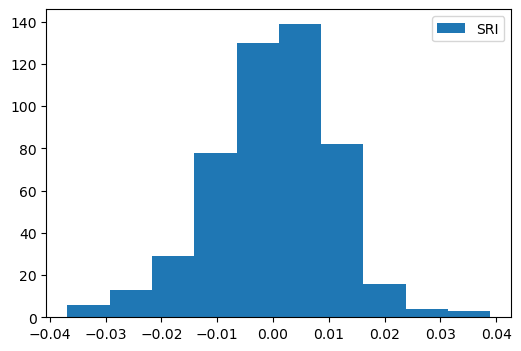

In [65]:
plt.figure(figsize=(6, 4))  
plt.hist(sri_portfolio, label='SRI')
plt.legend()
plt.show()

### TRA

In [66]:
print(tra_log_returnstest.head())

Ticker           EWH       SPY      URTH
2018-01-03  0.005817  0.006305  0.005952
2018-01-04  0.000387  0.004206  0.004469
2018-01-05  0.002702  0.006642  0.007883
2018-01-08 -0.000386  0.001827 -0.002436
2018-01-09  0.003080  0.002261  0.002326


In [67]:
print(optimal_weights_tra)

                 EWH      URTH       SPY
2018-01-04  0.333333  0.333333  0.333333
2018-01-05  0.333333  0.333333  0.333333
2018-01-08  0.333333  0.333333  0.333333
2018-01-09  0.333333  0.333333  0.333333
2018-01-10  0.333333  0.333333  0.333333
...              ...       ...       ...
2019-11-28  0.333333  0.333333  0.333333
2019-11-29  0.333333  0.333333  0.333333
2019-12-02  0.333333  0.333333  0.333333
2019-12-03  0.333333  0.333333  0.333333
2019-12-04  0.333333  0.333333  0.333333

[500 rows x 3 columns]


In [68]:
tra_log_returnstest.index = pd.to_datetime(tra_log_returnstest.index)

# Print the initial DataFrame and its index to confirm
print("Original DataFrame:")
print(tra_log_returnstest)
print(tra_log_returnstest.index)

# Trim the DataFrame starting from '2018-01-04'
trim_log_returns_tra = tra_log_returnstest.loc['2018-01-04':]

# Print the trimmed DataFrame and its index to confirm
print("\nTrimmed DataFrame:")
print(trim_log_returns_tra)
print(trim_log_returns_tra.index)

Original DataFrame:
Ticker           EWH       SPY      URTH
2018-01-03  0.005817  0.006305  0.005952
2018-01-04  0.000387  0.004206  0.004469
2018-01-05  0.002702  0.006642  0.007883
2018-01-08 -0.000386  0.001827 -0.002436
2018-01-09  0.003080  0.002261  0.002326
...              ...       ...       ...
2019-11-28 -0.001662  0.001527 -0.000305
2019-11-29  0.000831  0.000031  0.000508
2019-12-02  0.003732  0.005309  0.003748
2019-12-03  0.004131 -0.000248  0.001717
2019-12-04  0.001236 -0.005528 -0.007497

[501 rows x 3 columns]
DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-15', '2018-01-16',
               ...
               '2019-11-21', '2019-11-22', '2019-11-25', '2019-11-26',
               '2019-11-27', '2019-11-28', '2019-11-29', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', length=501, freq='B')

Trimmed DataF

In [69]:
print("Columns of trim_log_returns tra:")
print(trim_log_returns_tra.columns)

print("Columns of optimal_weights_tra:")
print(optimal_weights_tra.columns)

Columns of trim_log_returns tra:
Index(['EWH', 'SPY', 'URTH'], dtype='object', name='Ticker')
Columns of optimal_weights_tra:
Index(['EWH', 'URTH', 'SPY'], dtype='object')


In [70]:
# Ensure the indices match
optimal_weights_tra = optimal_weights_tra.reindex(trim_log_returns_tra.index)

# Fill any potential missing values (if any dates are missing in the weights data)
optimal_weights_tra.ffill(inplace=True)

# Remove the column name from trim_log_returns to match optimal_weights_sri
trim_log_returns_tra.columns.name = None

# Rename and reorder the columns of optimal_weights_sri to match those of trim_log_returns
optimal_weights_tra = optimal_weights_tra[trim_log_returns_tra.columns]

# Verify the column names after renaming and reordering
print("Columns of optimal_weights_tra after renaming and reordering:")
print(optimal_weights_tra.columns)
print("Columns of trim_log_returns tra:")
print(optimal_weights_tra.columns)

Columns of optimal_weights_tra after renaming and reordering:
Index(['EWH', 'SPY', 'URTH'], dtype='object')
Columns of trim_log_returns tra:
Index(['EWH', 'SPY', 'URTH'], dtype='object')


In [71]:
# Ensure the indices match
# Fill any potential missing values (if any dates are missing in the weights data)
optimal_weights_tra.ffill(inplace=True)

In [72]:
tra_portfolio= calculate_portfolio_returns_from_weights(trim_log_returns_tra, optimal_weights_tra)
print(tra_portfolio)

2018-01-04    0.003020
2018-01-05    0.005742
2018-01-08   -0.000332
2018-01-09    0.002556
2018-01-10   -0.002184
                ...   
2019-11-28   -0.000147
2019-11-29    0.000457
2019-12-02    0.004263
2019-12-03    0.001867
2019-12-04   -0.003930
Freq: B, Length: 500, dtype: float64


In [73]:
portfolio_summarize(tra_portfolio)

Mean of Portfolio Returns: 0.00013674147689169046
Variance of Portfolio Returns: 7.806499892028108e-05
Kurtosis of Portfolio Returns: 5.088764576908253
Skewness of Portfolio Returns: -0.4967476897946398
Jarque-Bera Test Statistic: 111.45771931274916
Jarque-Bera Test p-value: 6.269945537961494e-25


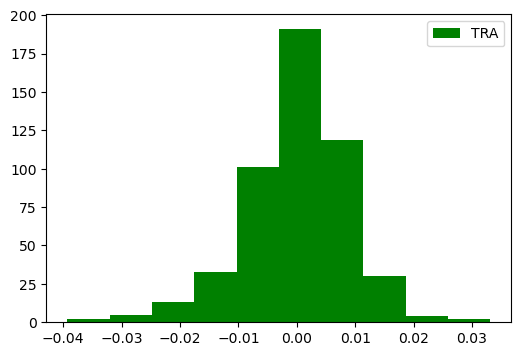

In [74]:
plt.figure(figsize=(6, 4))  
plt.hist(tra_portfolio, label='TRA', color='green')
plt.legend()
plt.show()